In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import seaborn as sns
from pathlib import Path
from src.processor import Processor
from src.generator import Generator
from src.plotter import Plotter

def find_repo_root(start: Path = Path.cwd()) -> Path:
    for parent in [start] + list(start.parents):
        if (parent / ".git").exists():
            return parent
    return start  

repo_root = find_repo_root()
os.chdir(repo_root)

c:\Users\Julian\anaconda3\envs\sbi_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
from src.data import Dataset
dataset = Dataset()
_, _, _, ell_high, _, lmin, lmax, _, cov_matrix = dataset.import_data()
print(ell_high.shape, lmin.shape, lmax.shape, cov_matrix.shape)
print(lmin, lmax)

torch.Size([74]) torch.Size([74]) torch.Size([74]) torch.Size([74, 74])
tensor([  32,   63,   94,  125,  156,  187,  218,  249,  280,  311,  342,  373,
         404,  435,  466,  497,  528,  559,  590,  621,  652,  683,  714,  745,
         776,  807,  838,  869,  900,  931,  962,  993, 1024, 1055, 1086, 1117,
        1148, 1179, 1210, 1241, 1272, 1303, 1334, 1365, 1396, 1427, 1458, 1489,
        1520, 1551, 1582, 1613, 1644, 1675, 1706, 1737, 1768, 1799, 1830, 1861,
        1892, 1923, 1954, 1985, 2016, 2047, 2078, 2109, 2140, 2171, 2202, 2239,
        2288, 2359], dtype=torch.int16) tensor([  62,   93,  124,  155,  186,  217,  248,  279,  310,  341,  372,  403,
         434,  465,  496,  527,  558,  589,  620,  651,  682,  713,  744,  775,
         806,  837,  868,  899,  930,  961,  992, 1023, 1054, 1085, 1116, 1147,
        1178, 1209, 1240, 1271, 1302, 1333, 1364, 1395, 1426, 1457, 1488, 1519,
        1550, 1581, 1612, 1643, 1674, 1705, 1736, 1767, 1798, 1829, 1860, 1891,
        

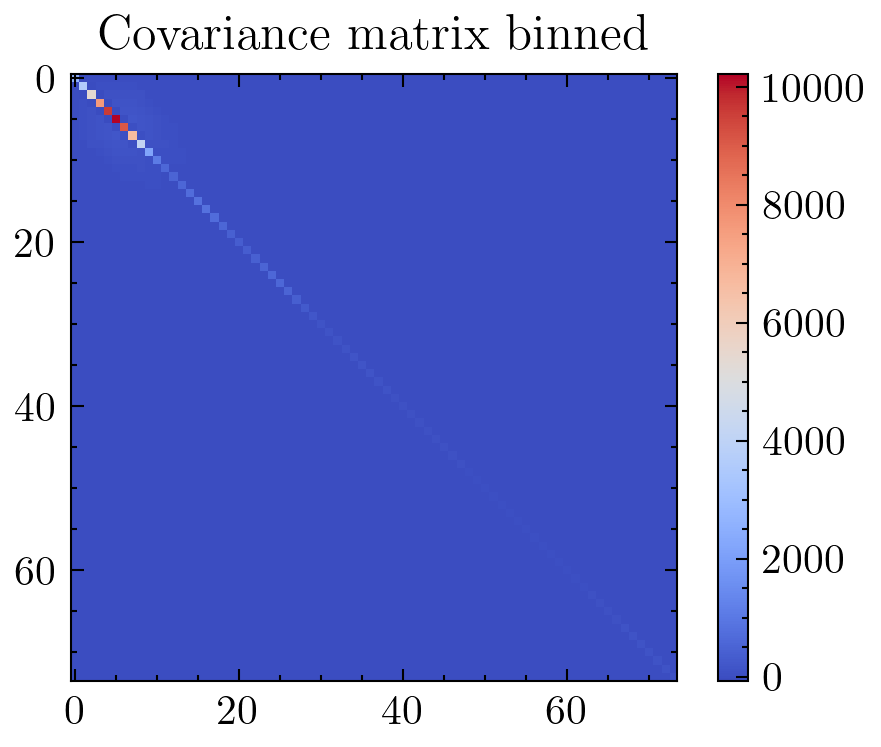

C:\Users\Julian\AppData\Local\Temp\ipykernel_12920\3514528021.py:9: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  cov_matrix = np.abs(cov_matrix)


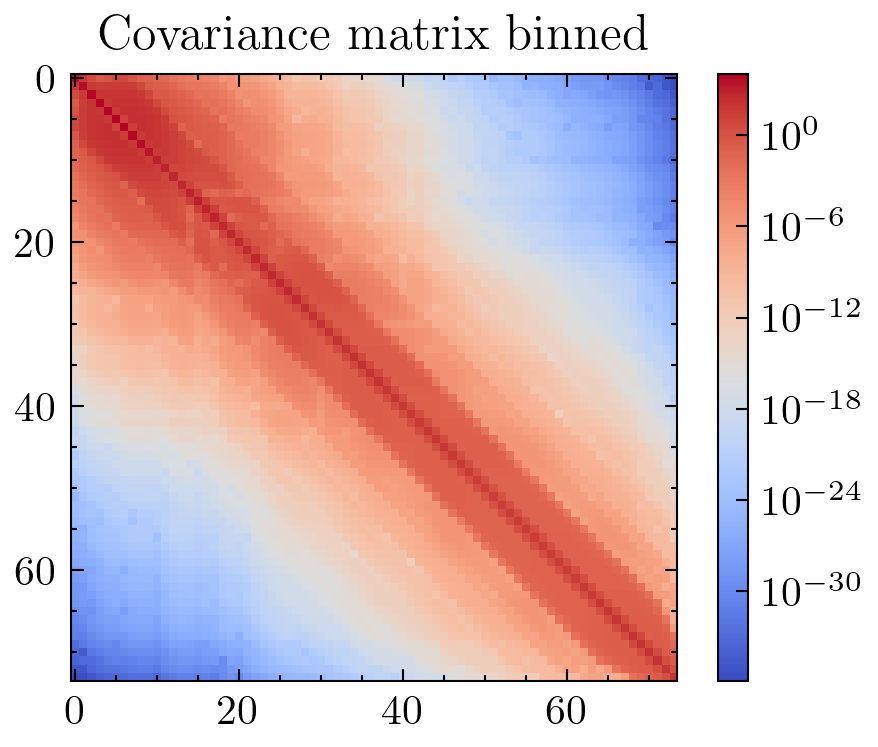

In [38]:
import matplotlib.colors as colors

cov_matrix = cov_matrix
plt.imshow(cov_matrix, cmap='coolwarm')
plt.colorbar()
plt.title("Covariance matrix binned")
plt.show()

cov_matrix = np.abs(cov_matrix)
plt.imshow(cov_matrix, cmap='coolwarm', norm=colors.LogNorm(vmin=cov_matrix.min(), vmax=cov_matrix.max()))
plt.colorbar()
plt.title("Covariance matrix binned")
plt.show()

torch.Size([2448, 2448])


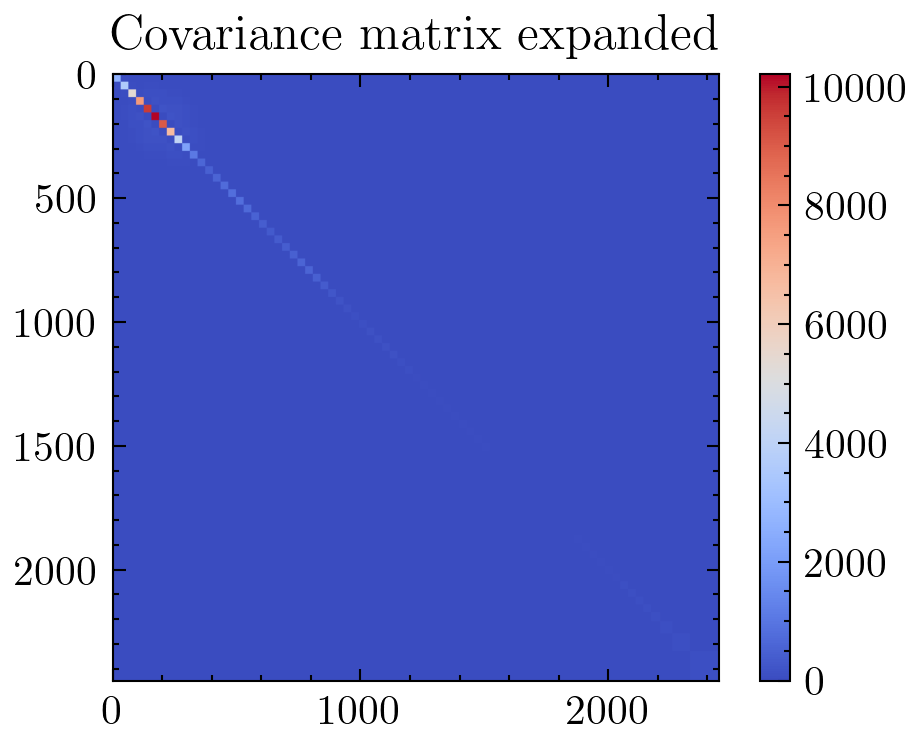

C:\Users\Julian\AppData\Local\Temp\ipykernel_12920\3542261189.py:13: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  normalized_cov = np.abs(cov)


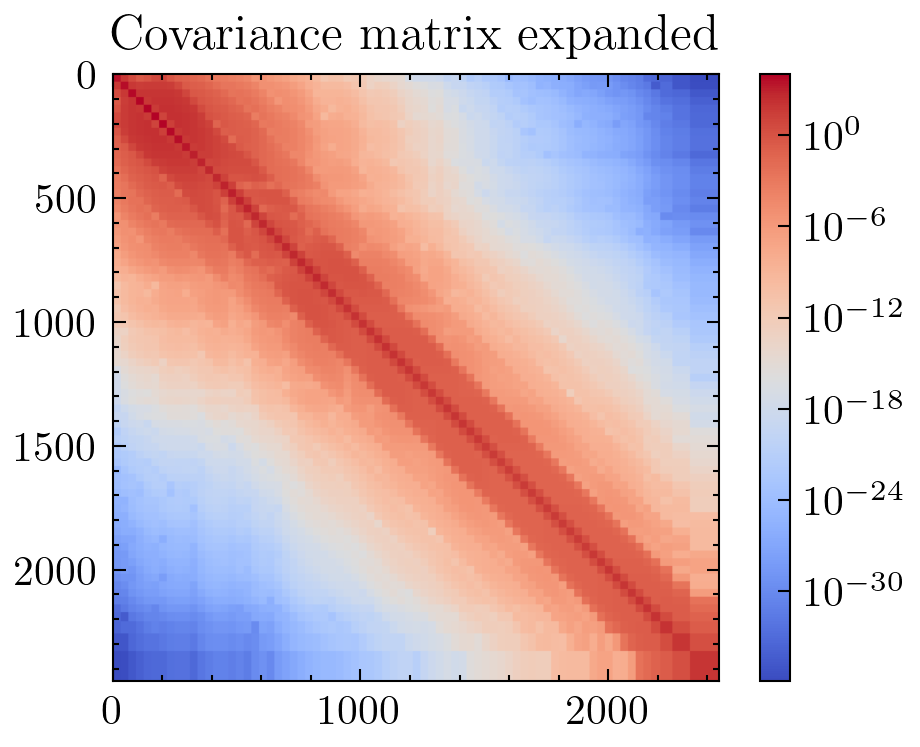

In [42]:
from src.processor import Processor
import matplotlib.colors as colors

pro = Processor()
cov = pro.expand_cov_from_binned(cov_matrix, lmin, lmax)
print(cov.shape)

plt.imshow(cov, cmap='coolwarm')
plt.colorbar()
plt.title("Covariance matrix expanded")
plt.show()

normalized_cov = np.abs(cov)
plt.imshow(normalized_cov, cmap='coolwarm', norm=colors.LogNorm(vmin=normalized_cov.min(), vmax=normalized_cov.max()))
plt.colorbar()
plt.title("Covariance matrix expanded")
plt.show()